## Figure 8

Code to reproduce Figure 8 - Ozone mass deficit and total column ozone

Data used:
- Ozone mass deficit (220DU, 175DU)
    - filenames: *daily_ozone_deficit_175DU.nc, *daily_ozone_deficit_220DU.nc
- Total column ozone
    - filenames: *monthly_volc_ozone.nc

## Import packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import cftime

In [6]:
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'

plt.rc('font', size=16)          # controls default text sizes          
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title

## Functions

In [47]:
def calc_max_min(da):

    concat_da = da.resample(time='YE').mean(dim='time')

    df_mean = concat_da.mean(dim='ensemble')

    df_max = concat_da.max(dim='ensemble')

    df_min = concat_da.min(dim='ensemble')
    
    return df_mean, df_max, df_min

def calc_3yr_moving_mean(df_annual):
    data = df_annual.rolling(time=3, center=True).mean()
    return data

def calc_30yr_moving_mean(df_annual):
    data = df_annual.rolling(time=30, center=True).mean()
    return data

def calc_mean_max_min(df):
    
    # Mean of ensembles
    df_mean = df.mean(dim='ensemble')

    # Maximum along ensemble
    df_max = df.max(dim='ensemble')

    # Minimum along ensemble
    df_min = df.min(dim='ensemble')
    
    return df_mean, df_max, df_min
    
def plot_ozone_deficit(ax, df, df_max, df_min):

    lighlbl = '#C7E9FF'
    ax.plot(year_axis, df['volc25'].ozone_deficit, color = 'navy', ls = 'dashdot', label = 'VOLC2.5', linewidth = 2)
    ax.plot(year_axis, df['volc50_1'].ozone_deficit, color = 'navy', ls = 'solid', label = 'VOLC50-1', linewidth = 2)
    ax.plot(year_axis, df['volc50_2'].ozone_deficit, color = 'navy', ls = 'dashed', label = 'VOLC50-2', linewidth = 2)
    ax.plot(year_axis, df['volc98'].ozone_deficit, color = 'navy', ls = 'dotted', label = 'VOLC98', linewidth = 2)
    ax.plot(year_axis, df['novolc'].ozone_deficit, color = 'red', label = 'NOVOLC', linewidth = 2.5)
    
    
    ax.fill_between(year_axis, df['volc98'].ozone_deficit, df_max['volc98'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc98'].ozone_deficit, df_min['volc98'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_1'].ozone_deficit, df_max['volc50_1'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_1'].ozone_deficit, df_min['volc50_1'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_2'].ozone_deficit, df_max['volc50_2'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_2'].ozone_deficit, df_min['volc50_2'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc25'].ozone_deficit, df_max['volc25'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc25'].ozone_deficit, df_min['volc25'].ozone_deficit, color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['novolc'].ozone_deficit, df_max['novolc'].ozone_deficit, color = 'pink', alpha = 0.3)
    ax.fill_between(year_axis, df['novolc'].ozone_deficit, df_min['novolc'].ozone_deficit, color = 'pink', alpha = 0.3)

    return ax

def calc_toc_SH_pole_oct(df):

    def is_oct(month):
        return (month == 10)
  
    temp = df.m01s50i219[:,:,0:24,:]
    weights = np.cos(np.deg2rad(temp.latitude[0:24]))
    weights.name = "weights"
    temp_w = temp.weighted(weights)
    toc_sum = temp_w.mean(dim=['latitude','longitude'])
    zonal_sum = temp_w.mean(dim=['longitude'])

    toc = toc_sum.sel(time=is_oct(toc_sum['time.month']))
    zonal_ensem = zonal_sum.sel(time=is_oct(zonal_sum['time.month']))#.mean(dim='ensemble')
    
    return toc, zonal_ensem

def plot_tco(ax,df,df_max,df_min):
    ax.plot(year_axis, df['volc50_1'], color = 'navy', ls = 'solid', label = 'VOLC50-1', linewidth = 2)
    ax.plot(year_axis, df['volc50_2'], color = 'navy', ls = 'dashed', label = 'VOLC50-2', linewidth = 2)
    ax.plot(year_axis, df['volc25'], color = 'navy', ls = 'dashdot', label = 'VOLC2.5', linewidth = 2)
    ax.plot(year_axis, df['volc98'], color = 'navy', ls = 'dotted', label = 'VOLC98', linewidth = 2)
    ax.plot(year_axis, df['novolc'], color = 'red', ls = 'solid', label = 'NOVOLC', linewidth = 2.5)

    lighlbl = '#C7E9FF'

    ax.fill_between(year_axis, df['volc98'], df_max['volc98'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc98'] , df_min['volc98'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_1'], df_max['volc50_1'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_1'] , df_min['volc50_1'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_2'], df_max['volc50_2'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc50_2'] , df_min['volc50_2'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc25'], df_max['volc25'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['volc25'] , df_min['volc25'], color = lighlbl)#, alpha = 0.3)
    ax.fill_between(year_axis, df['novolc'], df_max['novolc'], color = 'pink', alpha = 0.2)
    ax.fill_between(year_axis, df['novolc'] , df_min['novolc'], color = 'pink', alpha = 0.2)

    return ax    

def calc_return_year(ssp370_30year_ens):
    # set a threshold at 0.1 million tonnes as the OMD value become small but not drop to zero 
    year_ens1 = ssp370_30year_ens.ozone_deficit[0,:].time[ssp370_30year_ens.ozone_deficit[0,:] < 0.1][0].time.item().year
    year_ens2 = ssp370_30year_ens.ozone_deficit[1,:].time[ssp370_30year_ens.ozone_deficit[1,:] < 0.1][0].time.item().year
    year_ens3 = ssp370_30year_ens.ozone_deficit[2,:].time[ssp370_30year_ens.ozone_deficit[2,:] < 0.1][0].time.item().year

    year_mean = (year_ens1+year_ens2+year_ens3)/3
    year_max = max(year_ens1, year_ens2, year_ens3)
    year_min = min(year_ens1, year_ens2, year_ens3)
    
    print(round(year_mean),'(',year_min,'-',year_max,')')

    return year_mean, year_max, year_min

## Plot Figure 8a - Ozone mass deficit (< 220DU)

In [35]:
os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/Ozone_daily/Ozone_processed/ozone_deficit/antarctic_220/')

ssp370_run = {'novolc': novolc,
              'volc50_1': volc50_1,
              'volc50_2': volc50_2,
              'volc50_1s': volc50_1s,
              'volc50_2s': volc50_2s,
              'volc98': volc98,
              'volc25': volc25}

for idx in ssp370_run:
   ssp370_run[idx] = xr.open_dataset(idx+'_monthly_ozone_deficit_220DU.nc')

In [50]:
ssp370_30year_mean = {}
ssp370_30year_max = {}
ssp370_30year_min = {}
ssp370_3year_mean = {}
ssp370_3year_max = {}
ssp370_3year_min = {}
year_mean = {}
year_max = {}
year_min = {}

for idx in ssp370_run:
    df = ssp370_run[idx]
 
    ssp370_30year_ens = calc_30yr_moving_mean(ssp370_run[idx].sel(time=ssp370_run[idx]['time.month']==10))

    print(idx," :")
    year_mean[idx], year_max[idx], year_min[idx] = calc_return_year(ssp370_30year_ens)
    ssp370_30year_mean[idx], ssp370_30year_max[idx], ssp370_30year_min[idx] = calc_max_min(ssp370_30year_ens)

    ssp370_3year_ens = calc_3yr_moving_mean(ssp370_run[idx].sel(time=ssp370_run[idx]['time.month']==10))
    ssp370_3year_mean[idx], ssp370_3year_max[idx], ssp370_3year_min[idx] = calc_max_min(ssp370_3year_ens)

novolc  :
2067 ( 2065 - 2069 )
volc50_1  :
2070 ( 2069 - 2072 )
volc50_2  :
2071 ( 2070 - 2072 )
volc50_1s  :
2068 ( 2067 - 2069 )
volc50_2s  :
2069 ( 2066 - 2070 )
volc98  :
2072 ( 2070 - 2073 )
volc25  :
2070 ( 2068 - 2071 )


Text(0.0, 1.0, 'October-mean ozone mass deficit (< 220 DU)\nover Antarctica (3-year moving mean)')

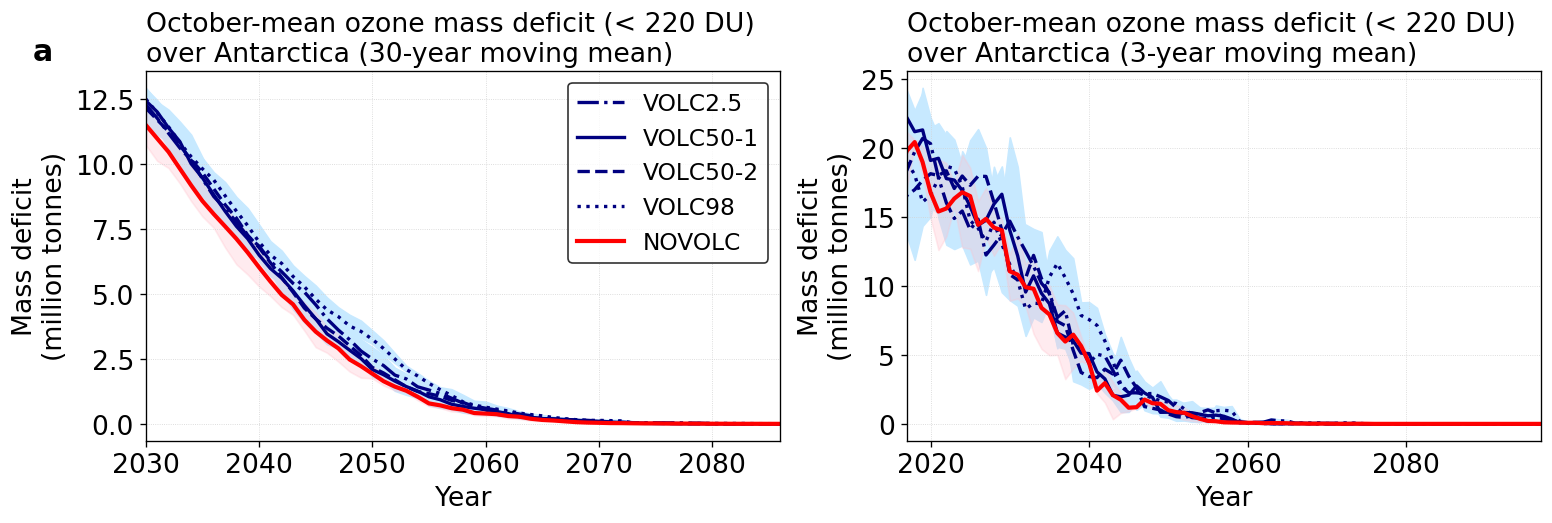

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4),dpi=120)

year_axis = np.arange(2015,2101,1)
daysince = cftime.date2num(ssp370_30year_mean['volc50_1'].time, 'days since 2015-01-01', '360_day')

plot_ozone_deficit(ax1, ssp370_30year_mean,ssp370_30year_max,ssp370_30year_min)
plot_ozone_deficit(ax2, ssp370_3year_mean,ssp370_3year_max,ssp370_3year_min)


for ax in (ax1,ax2):
    ax.set_ylabel('Mass deficit\n(million tonnes)')
    ax.set_xlabel('Year')
    ax.grid(color='lightgrey', which = 'both', linestyle='dotted', linewidth=0.5)

ax2.set_xlim(2017,2097)
ax1.set_xlim(2030,2086)

ax1.text(2020, 14, 'a', weight = 'bold', fontsize = 18)
ax1.legend(fontsize = 14, loc = 'upper right', ncol = 1)
ax1.set_title('October-mean ozone mass deficit (< 220 DU)\nover Antarctica (30-year moving mean)', loc = 'left')
ax2.set_title('October-mean ozone mass deficit (< 220 DU)\nover Antarctica (3-year moving mean)', loc = 'left')

In [52]:
# index 15 - year 2030
rel_con_volc25 = (ssp370_30year_mean['volc25'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc50_1 = (ssp370_30year_mean['volc50_1'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc50_2 = (ssp370_30year_mean['volc50_2'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc98 = (ssp370_30year_mean['volc98'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100

print('Relative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')


rel_con_volc25 = (ssp370_30year_mean['volc25'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc50_1 = (ssp370_30year_mean['volc50_1'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc50_2 = (ssp370_30year_mean['volc50_2'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc98 = (ssp370_30year_mean['volc98'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])

print('\nRelative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')


Relative contribution at 2030
VOLC25: 6.79
VOLC50_1: 8.11
VOLC50_2: 5.71
VOLC98: 8.72

Relative contribution at 2030
VOLC25: 0.78
VOLC50_1: 0.93
VOLC50_2: 0.66
VOLC98: 1.00


## Plot - Figure 8b (Ozone mass deficit < 175 DU)

In [55]:
os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/Ozone_daily/Ozone_processed/ozone_deficit/antarctic_175/')

ssp370_run = {'novolc': novolc,
              'volc50_1': volc50_1,
              'volc50_2': volc50_2,
              'volc50_1s': volc50_1s,
              'volc50_2s': volc50_2s,
              'volc98': volc98,
              'volc25': volc25}

for idx in ssp370_run:
    
   ssp370_run[idx] = xr.open_dataset(idx+'_monthly_ozone_deficit_175DU.nc')

In [56]:
ssp370_30year_mean = {}
ssp370_30year_max = {}
ssp370_30year_min = {}
ssp370_3year_mean = {}
ssp370_3year_max = {}
ssp370_3year_min = {}
year_mean = {}
year_max = {}
year_min = {}

for idx in ssp370_run:
    df = ssp370_run[idx]
 
    ssp370_30year_ens = calc_30yr_moving_mean(ssp370_run[idx].sel(time=ssp370_run[idx]['time.month']==10))

    print(idx," :")
    year_mean[idx], year_max[idx], year_min[idx] = calc_return_year(ssp370_30year_ens)
    ssp370_30year_mean[idx], ssp370_30year_max[idx], ssp370_30year_min[idx] = calc_max_min(ssp370_30year_ens)

    ssp370_3year_ens = calc_3yr_moving_mean(ssp370_run[idx].sel(time=ssp370_run[idx]['time.month']==10))
    ssp370_3year_mean[idx], ssp370_3year_max[idx], ssp370_3year_min[idx] = calc_max_min(ssp370_3year_ens)

novolc  :
2050 ( 2048 - 2051 )
volc50_1  :
2050 ( 2049 - 2052 )
volc50_2  :
2050 ( 2050 - 2051 )
volc50_1s  :
2050 ( 2049 - 2052 )
volc50_2s  :
2051 ( 2050 - 2053 )
volc98  :
2054 ( 2052 - 2055 )
volc25  :
2051 ( 2050 - 2052 )


Text(0.0, 1.0, 'October-mean ozone mass deficit (< 175 DU)\nover Antarctica (3-year moving mean)')

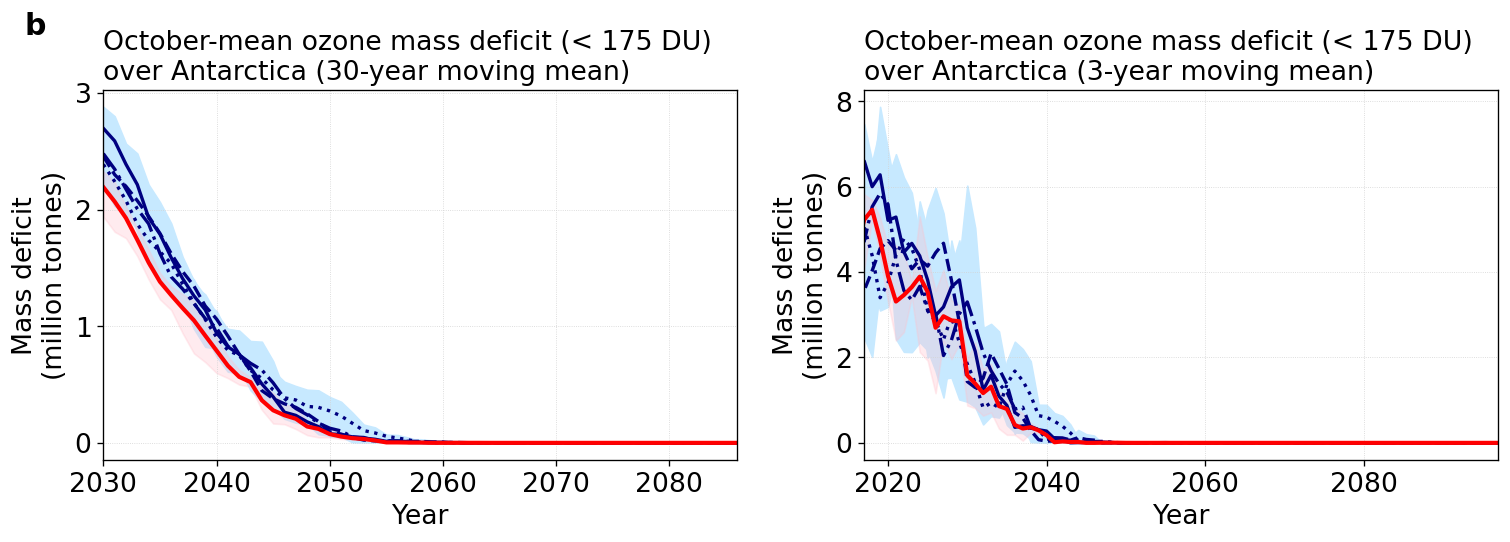

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4),dpi=120)

year_axis = np.arange(2015,2101,1)
daysince = cftime.date2num(ssp370_30year_mean['volc50_1'].time, 'days since 2015-01-01', '360_day')

plot_ozone_deficit(ax1, ssp370_30year_mean,ssp370_30year_max,ssp370_30year_min)
plot_ozone_deficit(ax2, ssp370_3year_mean,ssp370_3year_max,ssp370_3year_min)

for ax in (ax1,ax2):
    ax.set_ylabel('Mass deficit\n(million tonnes)')
    ax.set_xlabel('Year')
    ax.grid(color='lightgrey', which = 'both', linestyle='dotted', linewidth=0.5)


ax2.set_xlim(2017,2097)
ax1.set_xlim(2030,2086)

ax1.text(2023, 3.5, 'b', weight = 'bold', fontsize = 18)

ax1.set_title('October-mean ozone mass deficit (< 175 DU)\nover Antarctica (30-year moving mean)', loc = 'left')
ax2.set_title('October-mean ozone mass deficit (< 175 DU)\nover Antarctica (3-year moving mean)', loc = 'left')

In [58]:
# index 15 - year 2030
rel_con_volc25 = (ssp370_30year_mean['volc25'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc50_1 = (ssp370_30year_mean['volc50_1'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc50_2 = (ssp370_30year_mean['volc50_2'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100
rel_con_volc98 = (ssp370_30year_mean['volc98'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15]) / ssp370_30year_mean['novolc'].ozone_deficit[15] *100

print('Relative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')

rel_con_volc25 = (ssp370_30year_mean['volc25'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc50_1 = (ssp370_30year_mean['volc50_1'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc50_2 = (ssp370_30year_mean['volc50_2'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])
rel_con_volc98 = (ssp370_30year_mean['volc98'].ozone_deficit[15] - ssp370_30year_mean['novolc'].ozone_deficit[15])

print('\nRelative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')


Relative contribution at 2030
VOLC25: 13.10
VOLC50_1: 22.99
VOLC50_2: 12.04
VOLC98: 8.88

Relative contribution at 2030
VOLC25: 0.29
VOLC50_1: 0.50
VOLC50_2: 0.26
VOLC98: 0.19


## Plot - Figure 8c (Total Column Ozone)

In [59]:
os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/ozone_all_levs_monthly/')

ssp370_run = {'novolc': novolc,
              'volc50_1': volc50_1,
              'volc50_2': volc50_2,
              'volc50_1s': volc50_1s,
              'volc50_2s': volc50_2s,
              'volc98': volc98,
              'volc25': volc25}

for idx in ssp370_run:
    ssp370_run[idx] = xr.open_dataset(idx+'_monthly_volc_ozone.nc')

In [60]:
df_antar = {'30yr_mean': {},'30yr_max': {}, '30yr_min': {}, '30yr_ens1':{}, '30yr_ens2':{}, '30yr_ens3':{},
            '3yr_mean':{},'3yr_max': {}, '3yr_min': {}, '3yr_ens1':{}, '3yr_ens2':{}, '3yr_ens3':{}}

for idx in ssp370_run:
    for i in range(len(ssp370_run[idx])):
        
        antar_oct, antar_zonal = calc_toc_SH_pole_oct(ssp370_run[idx])
        antar_mean, antar_max, antar_min = calc_mean_max_min(antar_oct)

        temp = calc_30yr_moving_mean(antar_oct)
        df_antar['30yr_mean'][idx], df_antar['30yr_max'][idx], df_antar['30yr_min'][idx] = calc_mean_max_min(temp) 
        df_antar['30yr_ens1'][idx] = calc_30yr_moving_mean(antar_oct[0])
        df_antar['30yr_ens2'][idx] = calc_30yr_moving_mean(antar_oct[1])
        df_antar['30yr_ens3'][idx] = calc_30yr_moving_mean(antar_oct[2])

        temp2 = calc_3yr_moving_mean(antar_oct)
        df_antar['3yr_mean'][idx], df_antar['3yr_max'][idx], df_antar['3yr_min'][idx] = calc_mean_max_min(temp2) 
        df_antar['3yr_ens1'][idx] = calc_3yr_moving_mean(antar_oct[0])
        df_antar['3yr_ens2'][idx] = calc_3yr_moving_mean(antar_oct[1])
        df_antar['3yr_ens3'][idx] = calc_3yr_moving_mean(antar_oct[2])


Text(0.0, 1.0, 'October-mean total column ozone\nover Antarctica (3-year moving mean)')

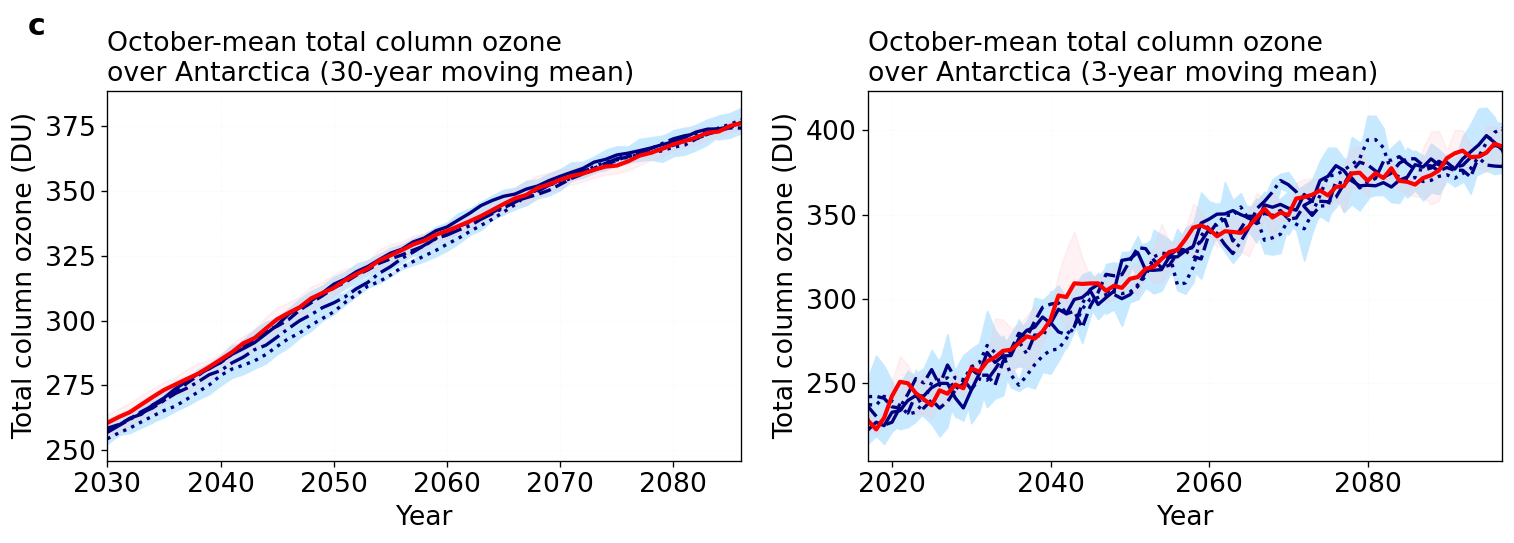

In [61]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,4),dpi=120)

ax1.grid(color='grey', which = 'both', linestyle='dotted', linewidth=0.5, alpha = 0.2)
ax2.grid(color='grey', which = 'both', linestyle='dotted', linewidth=0.5, alpha = 0.2)

year_axis = np.arange(2015,2101,1)

plot_tco(ax1, df_antar['30yr_mean'], df_antar['30yr_max'], df_antar['30yr_min'])
plot_tco(ax2, df_antar['3yr_mean'], df_antar['3yr_max'], df_antar['3yr_min'])


ax1.set_xlim(2030,2086)
ax2.set_xlim(2017,2097)

for ax in (ax1, ax2):
    ax.set_ylabel('Total column ozone (DU)')
    ax.set_xlabel('Year')
    ax.grid(color='lightgrey', which = 'both', linestyle='dotted', linewidth=0.5)

ax1.text(2023, 410, 'c', weight = 'bold', fontsize = 18)
ax1.set_title('October-mean total column ozone\nover Antarctica (30-year moving mean)', loc = 'left')
ax2.set_title('October-mean total column ozone\nover Antarctica (3-year moving mean)', loc = 'left')

In [62]:
model_thres = 338.341 # ukesm1.1 historical 1978-1982 mean
for idx in ssp370_run:
    scenario = str(idx)
    print('scenario: ', str(scenario))
    year_ens1 = df_antar['30yr_ens1'][scenario].time[df_antar['30yr_ens1'][scenario] > model_thres][0].values.item().year
    year_ens2 = df_antar['30yr_ens2'][scenario].time[df_antar['30yr_ens2'][scenario] > model_thres][0].values.item().year
    year_ens3 = df_antar['30yr_ens3'][scenario].time[df_antar['30yr_ens3'][scenario] > model_thres][0].values.item().year

    year_mean = (year_ens1+year_ens2+year_ens3)/3
    year_max = max(year_ens1, year_ens2, year_ens3)
    year_min = min(year_ens1, year_ens2, year_ens3)
    
    print(round(year_mean),'(',year_min,'-',year_max,')')


scenario:  novolc
2063 ( 2062 - 2064 )
scenario:  volc50_1
2061 ( 2061 - 2062 )
scenario:  volc50_2
2063 ( 2061 - 2064 )
scenario:  volc50_1s
2063 ( 2060 - 2065 )
scenario:  volc50_2s
2061 ( 2059 - 2063 )
scenario:  volc98
2064 ( 2063 - 2064 )
scenario:  volc25
2063 ( 2063 - 2063 )


In [63]:
# index 15 - year 2030
rel_con_volc25 = ((df_antar['30yr_mean']['volc25'] - df_antar['30yr_mean']['novolc'])/df_antar['30yr_mean']['novolc']*100)[15:36].mean()
rel_con_volc50_1 = ((df_antar['30yr_mean']['volc50_1'] - df_antar['30yr_mean']['novolc'])/df_antar['30yr_mean']['novolc']*100)[15:36].mean()
rel_con_volc50_2 = ((df_antar['30yr_mean']['volc50_2'] - df_antar['30yr_mean']['novolc'])/df_antar['30yr_mean']['novolc']*100)[15:36].mean()
rel_con_volc98 = ((df_antar['30yr_mean']['volc98'] - df_antar['30yr_mean']['novolc'])/df_antar['30yr_mean']['novolc']*100)[15:36].mean()

print('Relative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')

rel_con_volc25 = ((df_antar['30yr_mean']['volc25'] - df_antar['30yr_mean']['novolc']))[15:36].mean()
rel_con_volc50_1 = ((df_antar['30yr_mean']['volc50_1'] - df_antar['30yr_mean']['novolc']))[15:36].mean()
rel_con_volc50_2 = ((df_antar['30yr_mean']['volc50_2'] - df_antar['30yr_mean']['novolc']))[15:36].mean()
rel_con_volc98 = ((df_antar['30yr_mean']['volc98'] - df_antar['30yr_mean']['novolc']))[15:36].mean()

print('\nRelative contribution at 2030')
print(f'VOLC25: {rel_con_volc25.values:.2f}')
print(f'VOLC50_1: {rel_con_volc50_1.values:.2f}')
print(f'VOLC50_2: {rel_con_volc50_2.values:.2f}')
print(f'VOLC98: {rel_con_volc98.values:.2f}')


Relative contribution at 2030
VOLC25: -1.56
VOLC50_1: -0.54
VOLC50_2: -0.63
VOLC98: -2.81

Relative contribution at 2030
VOLC25: -4.51
VOLC50_1: -1.49
VOLC50_2: -1.76
VOLC98: -8.09
